# MMA 869 Assignment - Question 8

Nick Nguyen - Updated August 18th, 2019

## Import Packages, Environment Prep, etc.

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
sns.set_style('whitegrid')

In [0]:
np.random.seed(42)

The below code sets IPython to ignore the annoying `FutureWarning` that comes up whenever you run Logistic Regression. Necessary because if you do 5-fold CV with grid search it could get out of hand.

In [0]:
# Ignore the annoying FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
#warnings.simplefilter(action='ignore', category=ConvergenceWarning)
#warnings.simplefilter(action='ignore', category=DeprecationWarning)

## Import Data

In [0]:
dat = pd.read_csv('/content/drive/My Drive/Queen\'s MMA/Module 4/MMA 869 - Machine Learning and AI/Individual Assignment/OJ.CSV')

## Exploration

In [96]:
dat.shape

(1070, 19)

In [97]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 19 columns):
Unnamed: 0        1070 non-null int64
Purchase          1070 non-null object
WeekofPurchase    1070 non-null int64
StoreID           1070 non-null int64
PriceCH           1070 non-null float64
PriceMM           1070 non-null float64
DiscCH            1070 non-null float64
DiscMM            1070 non-null float64
SpecialCH         1070 non-null int64
SpecialMM         1070 non-null int64
LoyalCH           1070 non-null float64
SalePriceMM       1070 non-null float64
SalePriceCH       1070 non-null float64
PriceDiff         1070 non-null float64
Store7            1070 non-null object
PctDiscMM         1070 non-null float64
PctDiscCH         1070 non-null float64
ListPriceDiff     1070 non-null float64
STORE             1070 non-null int64
dtypes: float64(11), int64(6), object(2)
memory usage: 158.9+ KB


### Unnamed Column
Looks like there's a "Unnamed: 0" column (which I think is the ID column), let's remove it:

In [0]:
dat.drop('Unnamed: 0', axis = 1, inplace = True)

In [99]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
Purchase          1070 non-null object
WeekofPurchase    1070 non-null int64
StoreID           1070 non-null int64
PriceCH           1070 non-null float64
PriceMM           1070 non-null float64
DiscCH            1070 non-null float64
DiscMM            1070 non-null float64
SpecialCH         1070 non-null int64
SpecialMM         1070 non-null int64
LoyalCH           1070 non-null float64
SalePriceMM       1070 non-null float64
SalePriceCH       1070 non-null float64
PriceDiff         1070 non-null float64
Store7            1070 non-null object
PctDiscMM         1070 non-null float64
PctDiscCH         1070 non-null float64
ListPriceDiff     1070 non-null float64
STORE             1070 non-null int64
dtypes: float64(11), int64(5), object(2)
memory usage: 150.5+ KB


In [100]:
dat.describe()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,254.381308,3.959813,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782,1.962047,1.815561,0.146486,0.059298,0.027314,0.217991,1.630841
std,15.558286,2.308984,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843,0.252697,0.143384,0.271563,0.101760,0.062232,0.107535,1.430387
min,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000
25%,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257,1.690000,1.750000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.240000,2.000000
75%,268.000000,7.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873,2.130000,1.890000,0.320000,0.112676,0.000000,0.300000,3.000000
max,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,0.402010,0.252688,0.440000,4.000000


In [101]:
dat.head(10)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
5,CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0
6,CH,232,7,1.69,1.99,0.00,0.4,1,1,0.972182,1.59,1.69,-0.10,Yes,0.201005,0.000000,0.30,0
7,CH,234,7,1.75,1.99,0.00,0.4,1,0,0.977746,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
8,CH,235,7,1.75,1.99,0.00,0.4,0,0,0.982197,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
9,CH,238,7,1.75,1.99,0.00,0.4,0,0,0.985757,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0


### Investigate the `StoreID` and `STORE` features

In [102]:
dat['STORE'].value_counts()

0    356
2    222
3    196
1    157
4    139
Name: STORE, dtype: int64

In [103]:
dat['StoreID'].value_counts()

7    356
2    222
3    196
1    157
4    139
Name: StoreID, dtype: int64

They are the same!!! *insert Scooby Doo meme here*

### Missing Values?

In [104]:
dat.isnull().sum()

Purchase          0
WeekofPurchase    0
StoreID           0
PriceCH           0
PriceMM           0
DiscCH            0
DiscMM            0
SpecialCH         0
SpecialMM         0
LoyalCH           0
SalePriceMM       0
SalePriceCH       0
PriceDiff         0
Store7            0
PctDiscMM         0
PctDiscCH         0
ListPriceDiff     0
STORE             0
dtype: int64

In [105]:
dat.isnull().sum().sum()

0

## Visualizations

### See Class Balance:

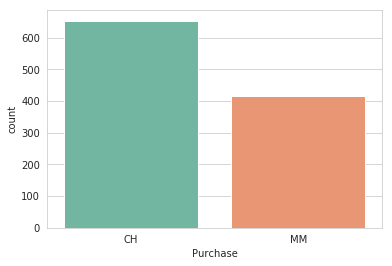

In [106]:
sns.countplot(dat['Purchase'], palette = 'Set2')
plt.show()

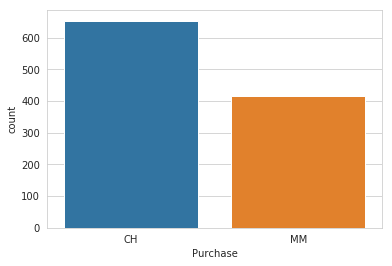

In [107]:
sns.countplot(dat['Purchase'])
plt.show()

### Correlation Matrix

In [0]:
dpal = sns.diverging_palette(220, 10, as_cmap = True)

CPU times: user 356 ms, sys: 202 ms, total: 558 ms
Wall time: 323 ms


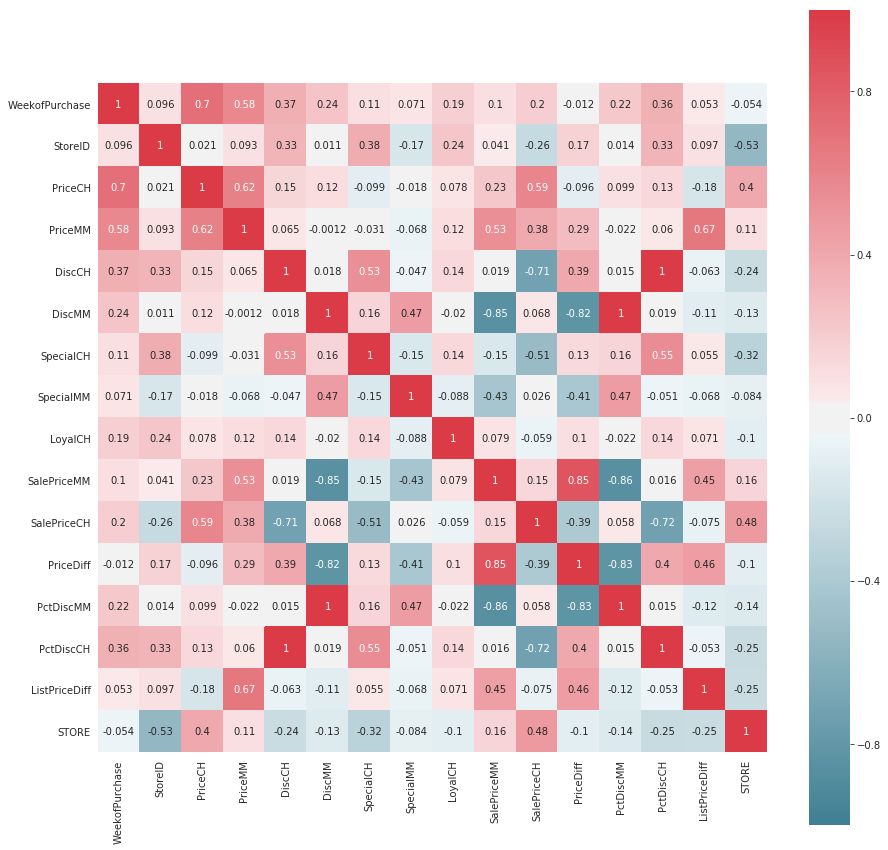

In [109]:
fig, ax = plt.subplots(figsize = (15,15))
%time sns.heatmap(dat.corr(), cmap = dpal, square = True, annot = True, vmin = -1, vmax = 1)
plt.show()

### Other visualizations

In [0]:
'''%time dat.hist(bins = 20, figsize = (20,20))
plt.show()'''

pass

In [0]:
'''%%time

plt.figure(figsize = (20,20))
sns.pairplot(dat, hue = 'Purchase')
plt.show()'''

pass

Other visualizations are to be done in Tableau/Power BI

## EDA Insights

* Two products: Citrus Hill (CH) and Minute Maid (MM)
* Classes are not severely imbalanced: around 60 - 40
* The `STORE` and `StoreID` columns are basically the same just with the store numbers reset.
* PriceCH and PriceMM are the prices for the two brands.
* DiscCH and DiscMM is the discount on each transaction.
* SpecialCH and SpecialMM is probably some special offer for either (or both) product at time of transaction.
* SalePriceCH and SalePriceMM are price after discount (above) is applied.
* PriceDiff is the price difference between the sale price of the two products.
    * PriceDiff = SalePriceMM - SalePriceCH
* Store7 seems to be a dummy for whether sale was in Store 7. Might indicate something special about Store 7.
* PctDiscCH and PctDiscMM is just the discount in percentage of original price (how many % off).
* ListPriceDiff is the price difference between original price of the products.
    * ListPriceDiff = PriceMM - PriceCH
* Don't know what LoyalCH is. Might indicate some loyalty program that the customer has.

## Preprocessing

#### Delete some redundant columns

* `STORE` is redundant, remove.
* `Store7` is also redundant, we will create dummies for all the stores.

In [0]:
dat_2 = dat.drop(['Store7', 'STORE'], axis = 1)

#### Encode Dummies

We will ignore `Purchase` because I think `sklearn` can handle custom labels in the target feature.

First we create an array of categorical features (only one is fine, makes it easy to change things later):

In [0]:
features_cat = ['StoreID']

Separate these:

In [0]:
dat_cat = dat[features_cat].copy().astype(str)

Create dummy variables:

In [0]:
dat_cat_dummies = pd.get_dummies(dat_cat)

Make sure everything is OK:

In [116]:
dat_cat_dummies.head()

,StoreID_1,StoreID_2,StoreID_3,StoreID_4,StoreID_7
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1


In [0]:
dat_num = dat_2.drop(features_cat, axis = 1)
dat_f = pd.concat([dat_num, dat_cat_dummies], axis = 1)

In [118]:
dat_f.head()

,Purchase,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,StoreID_1,StoreID_2,StoreID_3,StoreID_4,StoreID_7
0,CH,237,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24,1,0,0,0,0
1,CH,239,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24,1,0,0,0,0
2,CH,245,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23,1,0,0,0,0
3,MM,227,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00,1,0,0,0,0
4,CH,228,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00,0,0,0,0,1


In [119]:
dat_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 20 columns):
Purchase          1070 non-null object
WeekofPurchase    1070 non-null int64
PriceCH           1070 non-null float64
PriceMM           1070 non-null float64
DiscCH            1070 non-null float64
DiscMM            1070 non-null float64
SpecialCH         1070 non-null int64
SpecialMM         1070 non-null int64
LoyalCH           1070 non-null float64
SalePriceMM       1070 non-null float64
SalePriceCH       1070 non-null float64
PriceDiff         1070 non-null float64
PctDiscMM         1070 non-null float64
PctDiscCH         1070 non-null float64
ListPriceDiff     1070 non-null float64
StoreID_1         1070 non-null uint8
StoreID_2         1070 non-null uint8
StoreID_3         1070 non-null uint8
StoreID_4         1070 non-null uint8
StoreID_7         1070 non-null uint8
dtypes: float64(11), int64(3), object(1), uint8(5)
memory usage: 130.7+ KB


## Split Train and Test

TIL it's uppercase `X` and lowercase `y` because `X` is a matrix and `y` is a vector.

In [0]:
dat_X = dat_f.drop('Purchase', axis = 1)
dat_y = dat_f['Purchase'].copy()

In [0]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(dat_X, dat_y, test_size = 0.2, random_state = 42)

In [122]:
train_X.head()

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,StoreID_1,StoreID_2,StoreID_3,StoreID_4,StoreID_7
351,278,2.06,2.13,0.0,0.0,0,0,0.982408,2.13,2.06,0.07,0.0,0.000000,0.07,0,0,0,0,1
530,236,1.75,1.99,0.0,0.0,0,0,0.680000,1.99,1.75,0.24,0.0,0.000000,0.24,0,1,0,0,0
896,259,1.86,2.18,0.0,0.0,0,0,0.868928,2.18,1.86,0.32,0.0,0.000000,0.32,0,0,0,0,1
947,260,1.99,2.09,0.0,0.0,0,0,0.011649,2.09,1.99,0.10,0.0,0.000000,0.10,0,0,1,0,0
936,231,1.69,1.69,0.3,0.0,1,0,0.135607,1.69,1.39,0.30,0.0,0.177515,0.00,0,1,0,0,0


In [123]:
test_X.head()

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,StoreID_1,StoreID_2,StoreID_3,StoreID_4,StoreID_7
644,239,1.79,2.23,0.0,0.0,0,0,0.670149,2.23,1.79,0.44,0.000000,0.0,0.44,0,0,1,0,0
629,260,1.86,2.18,0.0,0.7,0,0,0.456000,1.48,1.86,-0.38,0.321101,0.0,0.32,0,1,0,0,0
70,274,1.99,2.09,0.0,0.4,0,0,0.718311,1.69,1.99,-0.30,0.191388,0.0,0.10,0,0,0,1,0
962,227,1.69,1.69,0.0,0.0,0,0,0.600000,1.69,1.69,0.00,0.000000,0.0,0.00,1,0,0,0,0
787,273,1.99,2.09,0.0,0.4,0,0,0.053687,1.69,1.99,-0.30,0.191388,0.0,0.10,0,0,1,0,0


In [124]:
train_y.head()

351    CH
530    MM
896    CH
947    MM
936    MM
Name: Purchase, dtype: object

In [125]:
test_y.head()

644    CH
629    MM
70     CH
962    CH
787    CH
Name: Purchase, dtype: object

## MVP Models

Since I'm not sure if Steve counts the ensemble tree algorithms (RF and XGB) to be a separate "classifier algorithm", I would build those two as extras. So I will build 7 models:
1. Logistic Regression
2. Decision Tree
    1. RandomForest
    2. XGB
4. K-Nearest Neighbours (KNN)
4. Artificial Neural Network (ANN)
5. Support Vector Machines (SVM)

In [0]:
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [129]:
logit_clf = LogisticRegression()
logit_clf.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
logit_cv_scores = cross_validate(logit_clf, train_X, train_y, scoring = 'roc_auc', cv = 5)

In [131]:
print('Logistic Regression CV AUC:\nMean: {}\nStandard Deviation: {}'
      .format(str(logit_cv_scores['test_score'].mean()),
              str(logit_cv_scores['test_score'].std())))

Logistic Regression CV AUC:
Mean: 0.9013991978171083
Standard Deviation: 0.0069398651150362044


In [132]:
logit_pred = logit_clf.predict(train_X)
confusion_matrix(train_y, logit_pred)

array([[465,  58],
       [ 77, 256]])

In [133]:
print(classification_report(train_y, logit_pred))

              precision    recall  f1-score   support

          CH       0.86      0.89      0.87       523
          MM       0.82      0.77      0.79       333

    accuracy                           0.84       856
   macro avg       0.84      0.83      0.83       856
weighted avg       0.84      0.84      0.84       856



### Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
tree_cv_scores = cross_validate(tree_clf, train_X, train_y, scoring = 'roc_auc', cv = 5)

In [137]:
print('Tree CV AUC:\nMean: {}\nStandard Deviation: {}'
      .format(str(tree_cv_scores['test_score'].mean()),
              str(tree_cv_scores['test_score'].std())))

Tree CV AUC:
Mean: 0.7731504875721293
Standard Deviation: 0.0366485901508359


In [138]:
tree_pred = tree_clf.predict(train_X)
confusion_matrix(train_y, tree_pred)

array([[521,   2],
       [  4, 329]])

In [139]:
print(classification_report(train_y, tree_pred))

              precision    recall  f1-score   support

          CH       0.99      1.00      0.99       523
          MM       0.99      0.99      0.99       333

    accuracy                           0.99       856
   macro avg       0.99      0.99      0.99       856
weighted avg       0.99      0.99      0.99       856



### RandomForest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
forest_clf = RandomForestClassifier()
forest_clf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
forest_cv_scores = cross_validate(forest_clf, train_X, train_y, scoring = 'roc_auc', cv = 5)

In [143]:
print('RandomForest CV AUC:\nMean: {}\nStandard Deviation: {}'
      .format(str(forest_cv_scores['test_score'].mean()),
              str(forest_cv_scores['test_score'].std())))

RandomForest CV AUC:
Mean: 0.8514588520931804
Standard Deviation: 0.034961711370810035


In [144]:
forest_pred = forest_clf.predict(train_X)
confusion_matrix(train_y, forest_pred)

array([[519,   4],
       [ 14, 319]])

In [145]:
print(classification_report(train_y, forest_pred))

              precision    recall  f1-score   support

          CH       0.97      0.99      0.98       523
          MM       0.99      0.96      0.97       333

    accuracy                           0.98       856
   macro avg       0.98      0.98      0.98       856
weighted avg       0.98      0.98      0.98       856



### Gradient Boosted Trees

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [147]:
boost_clf = GradientBoostingClassifier()
boost_clf.fit(train_X, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
boost_cv_scores = cross_validate(boost_clf, train_X, train_y, scoring = 'roc_auc', cv = 5)

In [149]:
print('Gradient Boosted CV AUC:\nMean: {}\nStandard Deviation: {}'
      .format(str(boost_cv_scores['test_score'].mean()),
              str(boost_cv_scores['test_score'].std())))

Gradient Boosted CV AUC:
Mean: 0.8940592802719667
Standard Deviation: 0.013584242599127392


In [150]:
boost_pred = boost_clf.predict(train_X)
confusion_matrix(train_y, boost_pred)

array([[482,  41],
       [ 55, 278]])

In [151]:
print(classification_report(train_y, boost_pred))

              precision    recall  f1-score   support

          CH       0.90      0.92      0.91       523
          MM       0.87      0.83      0.85       333

    accuracy                           0.89       856
   macro avg       0.88      0.88      0.88       856
weighted avg       0.89      0.89      0.89       856



### KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
knn_cv_scores = cross_validate(knn_clf, train_X, train_y, scoring = 'roc_auc', cv = 5)

In [155]:
print('KNN CV AUC:\nMean: {}\nStandard Deviation: {}'
      .format(str(knn_cv_scores['test_score'].mean()),
              str(knn_cv_scores['test_score'].std())))

KNN CV AUC:
Mean: 0.7526830569927585
Standard Deviation: 0.018199144666551533


In [156]:
knn_pred = knn_clf.predict(train_X)
confusion_matrix(train_y, knn_pred)

array([[465,  58],
       [102, 231]])

In [157]:
print(classification_report(train_y, knn_pred))

              precision    recall  f1-score   support

          CH       0.82      0.89      0.85       523
          MM       0.80      0.69      0.74       333

    accuracy                           0.81       856
   macro avg       0.81      0.79      0.80       856
weighted avg       0.81      0.81      0.81       856



### ANN

In [0]:
from sklearn.neural_network import MLPClassifier

In [159]:
ann_clf = MLPClassifier()
%time ann_clf.fit(train_X, train_y)

CPU times: user 1.15 s, sys: 795 ms, total: 1.94 s
Wall time: 991 ms


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [160]:
ann_cv_scores = cross_validate(ann_clf, train_X, train_y, scoring = 'roc_auc', cv = 5)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [161]:
print('ANN CV AUC:\nMean: {}\nStandard Deviation: {}'
      .format(str(ann_cv_scores['test_score'].mean()),
              str(ann_cv_scores['test_score'].std())))

ANN CV AUC:
Mean: 0.8792354784518963
Standard Deviation: 0.021043827193792514


In [162]:
ann_pred = ann_clf.predict(train_X)
confusion_matrix(train_y, ann_pred)

array([[452,  71],
       [ 74, 259]])

In [163]:
print(classification_report(train_y, ann_pred))

              precision    recall  f1-score   support

          CH       0.86      0.86      0.86       523
          MM       0.78      0.78      0.78       333

    accuracy                           0.83       856
   macro avg       0.82      0.82      0.82       856
weighted avg       0.83      0.83      0.83       856



### SVM

In [0]:
from sklearn.svm import SVC

In [165]:
svm_clf = SVC()
svm_clf.fit(train_X, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
svm_cv_scores = cross_validate(svm_clf, train_X, train_y, scoring = 'roc_auc', cv = 5)

In [167]:
print('SVM CV AUC:\nMean: {}\nStandard Deviation: {}'
      .format(str(svm_cv_scores['test_score'].mean()),
              str(svm_cv_scores['test_score'].std())))

SVM CV AUC:
Mean: 0.8385355440579321
Standard Deviation: 0.008783549721775042


In [168]:
svm_pred = svm_clf.predict(train_X)
confusion_matrix(train_y, svm_pred)

array([[485,  38],
       [125, 208]])

In [169]:
print(classification_report(train_y, svm_pred))

              precision    recall  f1-score   support

          CH       0.80      0.93      0.86       523
          MM       0.85      0.62      0.72       333

    accuracy                           0.81       856
   macro avg       0.82      0.78      0.79       856
weighted avg       0.81      0.81      0.80       856



## MVP Models Summary

| Model | AUC |
|--- | --- |
| LR | 0.90 |
| Tree | 0.76 |
| RF | 0.85 |
| GB | 0.89 |
| KNN | 0.75 |
| ANN | 0.88 |
| SVM | 0.83 |

The tree models are overfitting badly though, need to constrain them with hyperparams...

## Hyperparameter Tuning

In [0]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Logistic Regression

In [171]:
logit_hypers = {'penalty': ['l1', 'l2'],
               'C': [0.1, 1, 10, 50, 100, 150]}
logit_clf_cv = LogisticRegression()

logit_cv = GridSearchCV(logit_clf_cv, logit_hypers, scoring = 'roc_auc', cv = 5, return_train_score = False)
%time logit_cv.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


CPU times: user 1.85 s, sys: 590 µs, total: 1.85 s
Wall time: 1.85 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 50, 100, 150],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [172]:
logit_cv.best_params_

{'C': 150, 'penalty': 'l1'}

In [173]:
logit_cv.best_score_

0.9034767780517711

In [174]:
logit_cv.best_estimator_

LogisticRegression(C=150, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [175]:
logit_clf_final = LogisticRegression(C=150, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

%time logit_clf_final.fit(train_X, train_y)

CPU times: user 79.1 ms, sys: 0 ns, total: 79.1 ms
Wall time: 86.1 ms


LogisticRegression(C=150, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [176]:
logit_final_pred = logit_clf_final.predict(train_X)
confusion_matrix(train_y, logit_final_pred)

array([[464,  59],
       [ 74, 259]])

In [177]:
print(classification_report(train_y, logit_final_pred))

              precision    recall  f1-score   support

          CH       0.86      0.89      0.87       523
          MM       0.81      0.78      0.80       333

    accuracy                           0.84       856
   macro avg       0.84      0.83      0.84       856
weighted avg       0.84      0.84      0.84       856



### Decision Tree

In [178]:
tree_hypers = {'criterion':('gini', 'entropy'), 'max_depth':[2, 4, 6, 8, 10], 'min_samples_split':[2, 10, 50], 'min_samples_leaf':[1, 5, 10],
             'max_features':[None, 'auto'], 'max_leaf_nodes':[None, 5, 10, 50], 'min_impurity_decrease':[0, 0.1, 0.2]}
tree_clf_cv = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree_clf_cv, tree_hypers, scoring = 'roc_auc', cv = 5, return_train_score = False)
%time tree_cv.fit(train_X, train_y)

CPU times: user 1min 10s, sys: 166 ms, total: 1min 10s
Wall time: 1min 11s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8, 10],
                     

In [179]:
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 10,
 'min_samples_split': 50}

In [180]:
tree_cv.best_score_

0.8867452123334657

In [181]:
tree_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [182]:
tree_clf_final = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

tree_clf_final.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [183]:
tree_final_pred = tree_clf_final.predict(train_X)
confusion_matrix(train_y, tree_final_pred)

array([[478,  45],
       [ 77, 256]])

In [184]:
print(classification_report(train_y, tree_final_pred))

              precision    recall  f1-score   support

          CH       0.86      0.91      0.89       523
          MM       0.85      0.77      0.81       333

    accuracy                           0.86       856
   macro avg       0.86      0.84      0.85       856
weighted avg       0.86      0.86      0.86       856



### RandomForest

In [185]:
forest_hypers = {'n_estimators': [1, 10, 100],
                'criterion': ['gini', 'entropy'],
                'max_depth': [1, 10, 100],
                'min_samples_split': [2, 10, 50],
                'min_impurity_decrease': [0, 0.1, 0.2]}
forest_clf_cv = RandomForestClassifier()

forest_cv = GridSearchCV(forest_clf_cv, forest_hypers, scoring = 'roc_auc', cv = 5, return_train_score = False)
%time forest_cv.fit(train_X, train_y)

CPU times: user 35.3 s, sys: 24.3 ms, total: 35.3 s
Wall time: 35.4 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [186]:
forest_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 100,
 'min_impurity_decrease': 0,
 'min_samples_split': 50,
 'n_estimators': 100}

In [187]:
forest_cv.best_score_

0.8959886399112581

In [188]:
forest_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [189]:
forest_clf_final = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

forest_clf_final.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [190]:
forest_final_pred = forest_clf_final.predict(train_X)
confusion_matrix(train_y, forest_final_pred)

array([[472,  51],
       [ 67, 266]])

In [191]:
print(classification_report(train_y, forest_final_pred))

              precision    recall  f1-score   support

          CH       0.88      0.90      0.89       523
          MM       0.84      0.80      0.82       333

    accuracy                           0.86       856
   macro avg       0.86      0.85      0.85       856
weighted avg       0.86      0.86      0.86       856



### Gradient Boosted Trees

In [192]:
boost_hypers = {'loss': ['deviance', 'exponential'],
                'learning_rate': [0.1, 1, 10],
                'n_estimators': [50, 100, 150],
                'criterion': ['mse', 'friedman_mse'],
                'max_depth': [1, 10, 100]}#,
                #'min_samples_split': [2, 10, 50],
                #'min_impurity_decrease': [0, 0.1, 0.2]}
boost_clf_cv = GradientBoostingClassifier()

boost_cv = GridSearchCV(boost_clf_cv, boost_hypers, scoring = 'roc_auc', cv = 5, return_train_score = False)
%time boost_cv.fit(train_X, train_y)

CPU times: user 2min 36s, sys: 62.4 ms, total: 2min 36s
Wall time: 2min 36s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
                                                  random_state=None,

In [193]:
boost_cv.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 1,
 'n_estimators': 150}

In [194]:
boost_cv.best_score_

0.9021330413350309

In [195]:
boost_cv.best_estimator_

GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.1,
                           loss='deviance', max_depth=1, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=150, n_iter_no_change=None,
                           presort='auto', random_state=None, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [196]:
boost_clf_final = GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.1,
                           loss='deviance', max_depth=1, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=150, n_iter_no_change=None,
                           presort='auto', random_state=None, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

%time boost_clf_final.fit(train_X, train_y)

CPU times: user 92.9 ms, sys: 884 µs, total: 93.8 ms
Wall time: 97.2 ms


GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.1,
                           loss='deviance', max_depth=1, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=150, n_iter_no_change=None,
                           presort='auto', random_state=None, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [197]:
boost_final_pred = boost_clf_final.predict(train_X)
confusion_matrix(train_y, boost_final_pred)

array([[467,  56],
       [ 71, 262]])

In [198]:
print(classification_report(train_y, boost_final_pred))

              precision    recall  f1-score   support

          CH       0.87      0.89      0.88       523
          MM       0.82      0.79      0.80       333

    accuracy                           0.85       856
   macro avg       0.85      0.84      0.84       856
weighted avg       0.85      0.85      0.85       856



### KNN

In [199]:
knn_hypers = {'n_neighbors': [5, 10, 15, 50, 60, 70, 85, 89, 90, 91, 95, 120],
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
knn_clf_cv = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf_cv, knn_hypers, scoring = 'roc_auc', cv = 5, return_train_score = False)
%time knn_cv.fit(train_X, train_y)

CPU times: user 4.48 s, sys: 6.09 ms, total: 4.49 s
Wall time: 4.49 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [5, 10, 15, 50, 60, 70, 85, 89, 90, 91,
                                         95, 120],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [200]:
knn_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 90, 'weights': 'distance'}

In [201]:
knn_cv.best_score_

0.7913457932051442

In [202]:
knn_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=90, p=2,
                     weights='distance')

In [203]:
knn_clf_final = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=90, p=2,
                     weights='distance')

knn_clf_final.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=90, p=2,
                     weights='distance')

In [204]:
knn_final_pred = knn_clf_final.predict(train_X)
confusion_matrix(train_y, knn_final_pred)

array([[521,   2],
       [  4, 329]])

In [205]:
print(classification_report(train_y, knn_final_pred))

              precision    recall  f1-score   support

          CH       0.99      1.00      0.99       523
          MM       0.99      0.99      0.99       333

    accuracy                           0.99       856
   macro avg       0.99      0.99      0.99       856
weighted avg       0.99      0.99      0.99       856



### ANN

In [206]:
ann_hypers = {'hidden_layer_sizes': [(100,), (100,100), (10,10,10), (5,5,5), (5,5,5,5,5)],
             'activation': ['identity', 'logistic', 'tanh', 'relu'],
             'solver': ['lbfgs', 'sgd', 'adam'],
             'learning_rate': ['constant', 'invscaling', 'adaptive'],
             'alpha': [0.0001]}
ann_clf_cv = MLPClassifier()

ann_cv = GridSearchCV(ann_clf_cv, ann_hypers, scoring = 'roc_auc', cv = 5, return_train_score = False)
%time ann_cv.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

CPU times: user 6min 38s, sys: 3min 10s, total: 9min 48s
Wall time: 5min 40s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001],
                         'hidden_layer_sizes': [(100,), (100, 100),
                                 

In [207]:
ann_cv.best_params_

{'activation': 'logistic',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'invscaling',
 'solver': 'adam'}

In [208]:
ann_cv.best_score_

0.9014607265845234

In [209]:
ann_cv.best_estimator_

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='invscaling',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [210]:
ann_clf_final = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='invscaling',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

%time ann_clf_final.fit(train_X, train_y)

CPU times: user 2.95 s, sys: 1.84 s, total: 4.79 s
Wall time: 2.46 s


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='invscaling',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [211]:
ann_final_pred = ann_clf_final.predict(train_X)
confusion_matrix(train_y, ann_final_pred)

array([[482,  41],
       [112, 221]])

In [212]:
print(classification_report(train_y, ann_final_pred))

              precision    recall  f1-score   support

          CH       0.81      0.92      0.86       523
          MM       0.84      0.66      0.74       333

    accuracy                           0.82       856
   macro avg       0.83      0.79      0.80       856
weighted avg       0.82      0.82      0.82       856



### SVM

In [213]:
svm_hypers = {'C': [0.1, 1.0, 15, 20, 100],
             'kernel': ['rbf', 'sigmoid']}
svm_clf_cv = SVC()

svm_cv = GridSearchCV(svm_clf_cv, svm_hypers, scoring = 'roc_auc', cv = 5, return_train_score = False)
%time svm_cv.fit(train_X, train_y)

CPU times: user 1.31 s, sys: 17.2 ms, total: 1.33 s
Wall time: 1.32 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1.0, 15, 20, 100],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [214]:
svm_cv.best_params_

{'C': 15, 'kernel': 'rbf'}

In [215]:
svm_cv.best_score_

0.8820276973340511

In [216]:
svm_cv.best_estimator_

SVC(C=15, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [217]:
svm_clf_final = SVC(C=15, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

%time svm_clf_final.fit(train_X, train_y)

CPU times: user 47.1 ms, sys: 763 µs, total: 47.9 ms
Wall time: 49.2 ms


SVC(C=15, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [218]:
svm_final_pred = svm_clf_final.predict(train_X)
confusion_matrix(train_y, svm_final_pred)

array([[487,  36],
       [ 73, 260]])

In [219]:
print(classification_report(train_y, svm_final_pred))

              precision    recall  f1-score   support

          CH       0.87      0.93      0.90       523
          MM       0.88      0.78      0.83       333

    accuracy                           0.87       856
   macro avg       0.87      0.86      0.86       856
weighted avg       0.87      0.87      0.87       856



## Summary after Hyperparameter Tuning

| Model | MVP AUC | Best AUC |
| --- | --- | --- |
| LR | 0.90 | 0.90 |
| Tree | 0.76 | 0.89 |
| RF | 0.85 | 0.90 |
| GB | 0.89 | 0.90 |
| KNN | 0.75 | 0.79 |
| ANN | 0.88 | 0.90 |
| SVM | 0.83 | 0.88 |

## Validation on Test Set

For this task we will use the probabilities of each model and draw the ROC curve / calculate the AUC to compare the models.

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve

In [221]:
%time logit_final_proba = logit_clf_final.predict_proba(test_X)[:,1]
logit_auc = roc_auc_score(test_y, logit_final_proba)
logit_fpr, logit_tpr, _ = roc_curve(test_y, logit_final_proba, pos_label = "MM")
logit_auc

CPU times: user 2.01 ms, sys: 0 ns, total: 2.01 ms
Wall time: 2.55 ms


0.8792124542124542

In [222]:
tree_final_proba = tree_clf_final.predict_proba(test_X)[:,1]
tree_auc = roc_auc_score(test_y, tree_final_proba)
tree_fpr, tree_tpr, _ = roc_curve(test_y, tree_final_proba, pos_label = "MM")
tree_auc

0.8642857142857143

In [223]:
forest_final_proba = forest_clf_final.predict_proba(test_X)[:,1]
forest_auc = roc_auc_score(test_y, forest_final_proba)
forest_fpr, forest_tpr, _ = roc_curve(test_y, forest_final_proba, pos_label = "MM")
forest_auc

0.8671703296703296

In [224]:
%time boost_final_proba = boost_clf_final.predict_proba(test_X)[:,1]
boost_auc = roc_auc_score(test_y, boost_final_proba)
boost_fpr, boost_tpr, _ = roc_curve(test_y, boost_final_proba, pos_label = "MM")
boost_auc

CPU times: user 2.17 ms, sys: 786 µs, total: 2.96 ms
Wall time: 3.71 ms


0.875503663003663

In [225]:
knn_final_proba = knn_clf_final.predict_proba(test_X)[:,1]
knn_auc = roc_auc_score(test_y, knn_final_proba)
knn_fpr, knn_tpr, _ = roc_curve(test_y, knn_final_proba, pos_label = "MM")
knn_auc

0.7529304029304029

In [226]:
%time ann_final_proba = ann_clf_final.predict_proba(test_X)[:,1]
ann_auc = roc_auc_score(test_y, ann_final_proba)
ann_fpr, ann_tpr, _ = roc_curve(test_y, ann_final_proba, pos_label = "MM")
ann_auc

CPU times: user 4.65 ms, sys: 3.18 ms, total: 7.83 ms
Wall time: 6.16 ms


0.8786630036630036

In [227]:
svm_final_proba = svm_clf_final.decision_function(test_X)
svm_auc = roc_auc_score(test_y, svm_final_proba)
svm_fpr, svm_tpr, _ = roc_curve(test_y, svm_final_proba, pos_label = "MM")
svm_auc

0.8647435897435898

In [228]:
roc_auc_score(test_y, forest_clf_final.predict_proba(test_X)[:,1])

0.8671703296703296

In [229]:
roc_auc_score(test_y, boost_clf_final.predict_proba(test_X)[:,1])

0.875503663003663

In [230]:
roc_auc_score(test_y, knn_clf_final.predict_proba(test_X)[:,1])

0.7529304029304029

In [231]:
roc_auc_score(test_y, ann_clf_final.predict_proba(test_X)[:,1])

0.8786630036630036

In [232]:
roc_auc_score(test_y, svm_clf_final.decision_function(test_X))

0.8647435897435898

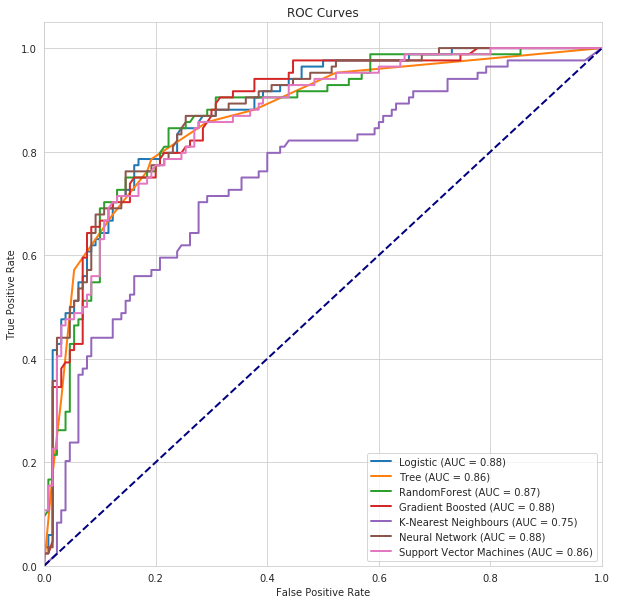

In [233]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(logit_fpr, logit_tpr, lw=lw, label='Logistic (AUC = %0.2f)' % logit_auc)
plt.plot(tree_fpr, tree_tpr, lw=lw, label='Tree (AUC = %0.2f)' % tree_auc)
plt.plot(forest_fpr, forest_tpr, lw=lw, label='RandomForest (AUC = %0.2f)' % forest_auc)
plt.plot(boost_fpr, boost_tpr, lw=lw, label='Gradient Boosted (AUC = %0.2f)' % boost_auc)
plt.plot(knn_fpr, knn_tpr, lw=lw, label='K-Nearest Neighbours (AUC = %0.2f)' % knn_auc)
plt.plot(ann_fpr, ann_tpr, lw=lw, label='Neural Network (AUC = %0.2f)' % ann_auc)
plt.plot(svm_fpr, svm_tpr, lw=lw, label='Support Vector Machines (AUC = %0.2f)' % svm_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

## The Final Three

Three models came out on top:

| Model | MVP AUC | Tuned AUC | Test Set AUC |
| --- | --- | --- | --- |
| **LR** | 0.90 | 0.90 | **0.88** |
| Tree | 0.76 | 0.89 | 0.86 |
| RF | 0.85 | 0.90 | 0.87 |
| **GB** | 0.89 | 0.90 | **0.88** |
| KNN | 0.75 | 0.79 | 0.75 |
| **ANN** | 0.88 | 0.90 | **0.88** |
| SVM | 0.83 | 0.88 | 0.86 |

Let's look at their performances:

In [234]:
logit_final_test_pred = logit_clf_final.predict(test_X)
confusion_matrix(test_y, logit_final_test_pred)

array([[113,  17],
       [ 24,  60]])

In [235]:
print(classification_report(test_y, logit_final_test_pred))

              precision    recall  f1-score   support

          CH       0.82      0.87      0.85       130
          MM       0.78      0.71      0.75        84

    accuracy                           0.81       214
   macro avg       0.80      0.79      0.80       214
weighted avg       0.81      0.81      0.81       214



In [236]:
boost_final_test_pred = boost_clf_final.predict(test_X)
confusion_matrix(test_y, boost_final_test_pred)

array([[115,  15],
       [ 27,  57]])

In [237]:
print(classification_report(test_y, boost_final_test_pred))

              precision    recall  f1-score   support

          CH       0.81      0.88      0.85       130
          MM       0.79      0.68      0.73        84

    accuracy                           0.80       214
   macro avg       0.80      0.78      0.79       214
weighted avg       0.80      0.80      0.80       214



In [238]:
ann_final_test_pred = ann_clf_final.predict(test_X)
confusion_matrix(test_y, ann_final_test_pred)

array([[119,  11],
       [ 33,  51]])

In [239]:
print(classification_report(test_y, ann_final_test_pred))

              precision    recall  f1-score   support

          CH       0.78      0.92      0.84       130
          MM       0.82      0.61      0.70        84

    accuracy                           0.79       214
   macro avg       0.80      0.76      0.77       214
weighted avg       0.80      0.79      0.79       214



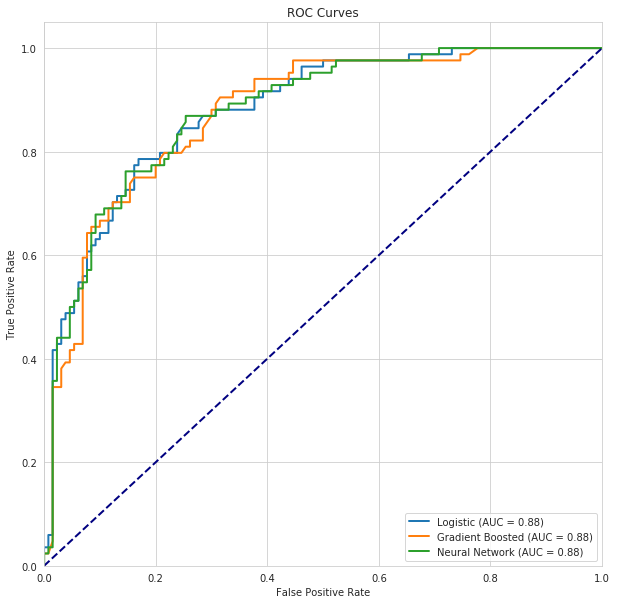

In [240]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(logit_fpr, logit_tpr, lw=lw, label='Logistic (AUC = %0.2f)' % logit_auc)
#plt.plot(tree_fpr, tree_tpr, lw=lw, label='Tree (AUC = %0.2f)' % tree_auc)
#plt.plot(forest_fpr, forest_tpr, lw=lw, label='RandomForest (AUC = %0.2f)' % forest_auc)
plt.plot(boost_fpr, boost_tpr, lw=lw, label='Gradient Boosted (AUC = %0.2f)' % boost_auc)
#plt.plot(knn_fpr, knn_tpr, lw=lw, label='K-Nearest Neighbours (AUC = %0.2f)' % knn_auc)
plt.plot(ann_fpr, ann_tpr, lw=lw, label='Neural Network (AUC = %0.2f)' % ann_auc)
#plt.plot(svm_fpr, svm_tpr, lw=lw, label='Support Vector Machines (AUC = %0.2f)' % svm_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

# Winner: Logistic Regression!!!

In [241]:
logit_final_test_pred = logit_clf_final.predict(test_X)
confusion_matrix(test_y, logit_final_test_pred)

array([[113,  17],
       [ 24,  60]])

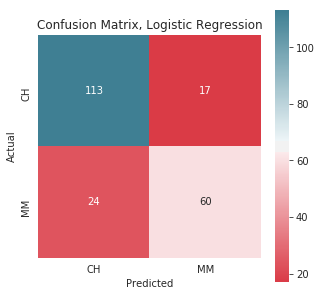

In [242]:
dpalr = sns.diverging_palette(10, 220, as_cmap = True)

logit_CM = confusion_matrix(test_y, logit_final_test_pred)
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(logit_CM, cmap = dpalr, square = True, annot = True, fmt = 'd')
plt.title('Confusion Matrix, Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.set_xticklabels(['CH','MM'])
ax.set_yticklabels(['CH','MM'])
plt.show()

In [243]:
print(classification_report(test_y, logit_final_test_pred))

              precision    recall  f1-score   support

          CH       0.82      0.87      0.85       130
          MM       0.78      0.71      0.75        84

    accuracy                           0.81       214
   macro avg       0.80      0.79      0.80       214
weighted avg       0.81      0.81      0.81       214



In [0]:
from yellowbrick.classifier import ClassificationReport, ClassPredictionError

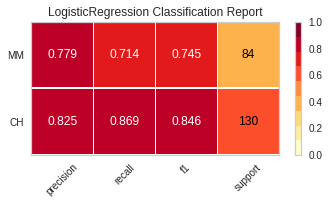

In [245]:
fig, ax = plt.subplots(figsize = (5,3))

visualizer = ClassificationReport(logit_clf_final, support=True)
visualizer.fit(train_X, train_y)
visualizer.score(test_X, test_y)
visualizer.poof()

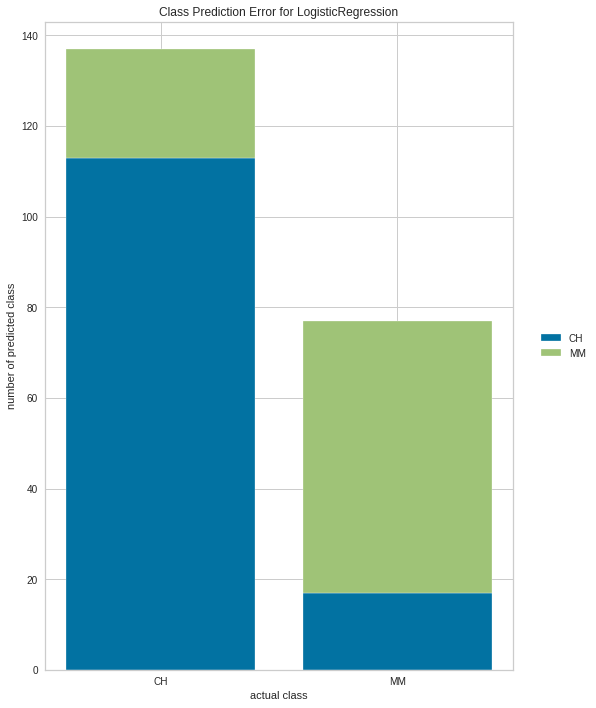

In [246]:
fig = plt.figure(figsize=(10,10))
visualizer = ClassPredictionError(logit_clf_final)
visualizer.fit(train_X, train_y)
visualizer.score(test_X, test_y)
visualizer.poof()

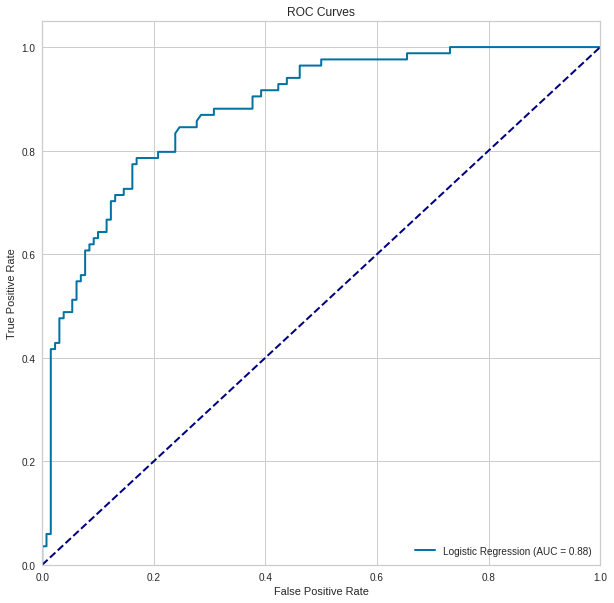

In [247]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(logit_fpr, logit_tpr, lw=lw, label='Logistic Regression (AUC = %0.2f)' % logit_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

## Last ditch effort to ensemble

In [0]:
from sklearn.ensemble import VotingClassifier

In [249]:
eclf = VotingClassifier(estimators = [('lr', logit_clf_final), ('boost', boost_clf_final), ('ann', ann_clf_final)], voting = 'soft')

%time eclf.fit(train_X, train_y)

CPU times: user 3.52 s, sys: 2.11 s, total: 5.63 s
Wall time: 2.95 s


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=150, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l1',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('boost',
                              GradientBoostingClassifier(criterion='mse',
                                                         init=None,
                                                         learning_rate=0.1...
                                

In [250]:
%time eclf_proba = eclf.predict_proba(test_X)[:,1]
eclf_auc = roc_auc_score(test_y, eclf_proba)
eclf_auc

CPU times: user 11.5 ms, sys: 3.43 ms, total: 14.9 ms
Wall time: 8.01 ms


0.8831501831501831

In [0]:
eclf_fpr, eclf_tpr, _ = roc_curve(test_y, eclf_proba, pos_label = "MM")

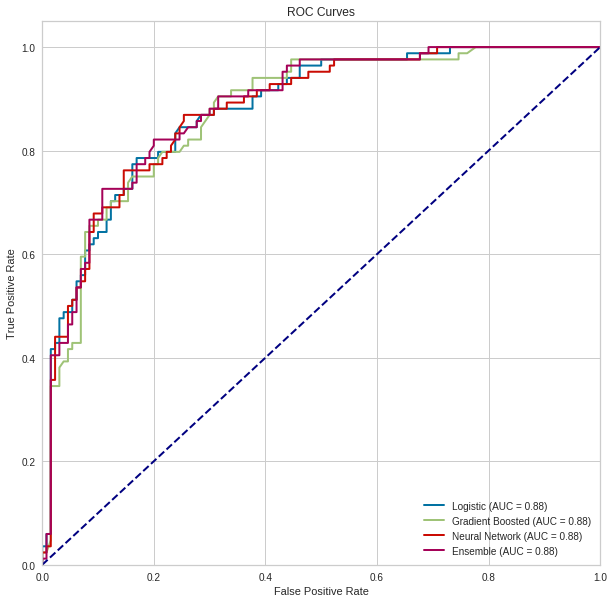

In [252]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(logit_fpr, logit_tpr, lw=lw, label='Logistic (AUC = %0.2f)' % logit_auc)
#plt.plot(tree_fpr, tree_tpr, lw=lw, label='Tree (AUC = %0.2f)' % tree_auc)
#plt.plot(forest_fpr, forest_tpr, lw=lw, label='RandomForest (AUC = %0.2f)' % forest_auc)
plt.plot(boost_fpr, boost_tpr, lw=lw, label='Gradient Boosted (AUC = %0.2f)' % boost_auc)
#plt.plot(knn_fpr, knn_tpr, lw=lw, label='K-Nearest Neighbours (AUC = %0.2f)' % knn_auc)
plt.plot(ann_fpr, ann_tpr, lw=lw, label='Neural Network (AUC = %0.2f)' % ann_auc)
#plt.plot(svm_fpr, svm_tpr, lw=lw, label='Support Vector Machines (AUC = %0.2f)' % svm_auc)
plt.plot(eclf_fpr, eclf_tpr, lw=lw, label='Ensemble (AUC = %0.2f)' % eclf_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [253]:
%time eclf_pred = eclf.predict(test_X)
print(classification_report(test_y, eclf_pred))

CPU times: user 9.27 ms, sys: 1.08 ms, total: 10.3 ms
Wall time: 11 ms
              precision    recall  f1-score   support

          CH       0.84      0.83      0.83       130
          MM       0.74      0.75      0.75        84

    accuracy                           0.80       214
   macro avg       0.79      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



## Miscellaneous

In [0]:
from yellowbrick.classifier import ROCAUC

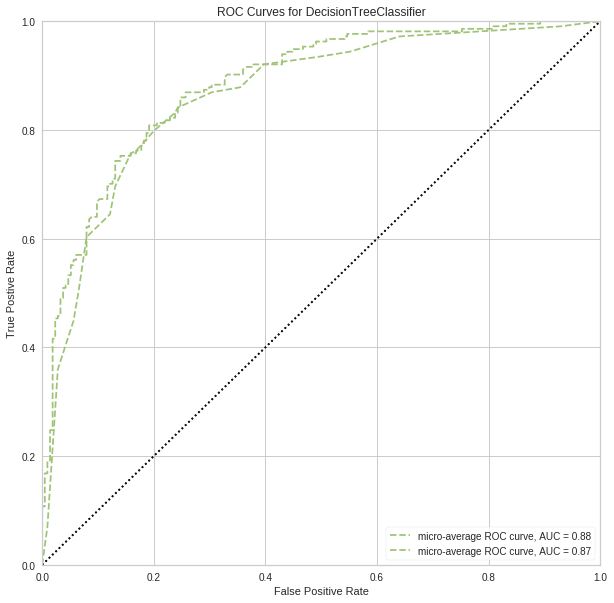

In [255]:
fig, ax = plt.subplots(figsize = (10,10))

logit_roc = ROCAUC(logit_clf_final, ax = ax, micro = True, macro = False, per_class = False)
logit_roc.fit(train_X, train_y)
logit_roc.score(test_X, test_y)
#logit_roc.poof()

tree_roc = ROCAUC(tree_clf_final, ax = ax, micro = True, macro = False, per_class = False)
tree_roc.fit(train_X, train_y)
tree_roc.score(test_X, test_y)
tree_roc.poof()

In [256]:
logit_final_test_pred = logit_clf_final.predict(test_X)
confusion_matrix(test_y, logit_final_test_pred)

array([[113,  17],
       [ 24,  60]])

In [257]:
print(classification_report(test_y, logit_final_test_pred))

              precision    recall  f1-score   support

          CH       0.82      0.87      0.85       130
          MM       0.78      0.71      0.75        84

    accuracy                           0.81       214
   macro avg       0.80      0.79      0.80       214
weighted avg       0.81      0.81      0.81       214



In [258]:
tree_final_test_pred = tree_clf_final.predict(test_X)
confusion_matrix(test_y, tree_final_test_pred)

array([[114,  16],
       [ 27,  57]])

In [259]:
print(classification_report(test_y, tree_final_test_pred))

              precision    recall  f1-score   support

          CH       0.81      0.88      0.84       130
          MM       0.78      0.68      0.73        84

    accuracy                           0.80       214
   macro avg       0.79      0.78      0.78       214
weighted avg       0.80      0.80      0.80       214



In [260]:
forest_final_test_pred = forest_clf_final.predict(test_X)
confusion_matrix(test_y, forest_final_test_pred)

array([[113,  17],
       [ 24,  60]])

In [261]:
print(classification_report(test_y, forest_final_test_pred))

              precision    recall  f1-score   support

          CH       0.82      0.87      0.85       130
          MM       0.78      0.71      0.75        84

    accuracy                           0.81       214
   macro avg       0.80      0.79      0.80       214
weighted avg       0.81      0.81      0.81       214



In [262]:
boost_final_test_pred = boost_clf_final.predict(test_X)
confusion_matrix(test_y, boost_final_test_pred)

array([[115,  15],
       [ 27,  57]])

In [263]:
print(classification_report(test_y, boost_final_test_pred))

              precision    recall  f1-score   support

          CH       0.81      0.88      0.85       130
          MM       0.79      0.68      0.73        84

    accuracy                           0.80       214
   macro avg       0.80      0.78      0.79       214
weighted avg       0.80      0.80      0.80       214



In [264]:
knn_final_test_pred = knn_clf_final.predict(test_X)
confusion_matrix(test_y, knn_final_test_pred)

array([[102,  28],
       [ 34,  50]])

In [265]:
print(classification_report(test_y, knn_final_test_pred))

              precision    recall  f1-score   support

          CH       0.75      0.78      0.77       130
          MM       0.64      0.60      0.62        84

    accuracy                           0.71       214
   macro avg       0.70      0.69      0.69       214
weighted avg       0.71      0.71      0.71       214



In [266]:
ann_final_test_pred = ann_clf_final.predict(test_X)
confusion_matrix(test_y, ann_final_test_pred)

array([[119,  11],
       [ 33,  51]])

In [267]:
print(classification_report(test_y, ann_final_test_pred))

              precision    recall  f1-score   support

          CH       0.78      0.92      0.84       130
          MM       0.82      0.61      0.70        84

    accuracy                           0.79       214
   macro avg       0.80      0.76      0.77       214
weighted avg       0.80      0.79      0.79       214



In [268]:
svm_final_test_pred = svm_clf_final.predict(test_X)
confusion_matrix(test_y, svm_final_test_pred)

array([[115,  15],
       [ 26,  58]])

In [269]:
print(classification_report(test_y, svm_final_test_pred))

              precision    recall  f1-score   support

          CH       0.82      0.88      0.85       130
          MM       0.79      0.69      0.74        84

    accuracy                           0.81       214
   macro avg       0.81      0.79      0.79       214
weighted avg       0.81      0.81      0.81       214

